In [1]:
from bs4 import BeautifulSoup as bs

In [3]:
import requests as req

### Airbnb needs API to scrape data

In [4]:
#url_npage = req.get('https://www.airbnb.fr/s/Maroc/homes?tab_id=home_tab&refinement_paths%5B%5D=%2Fhomes&price_filter_input_type=0&price_filter_num_nights=28&query=Maroc&place_id=ChIJjcVRlmGICw0Rw_8sxIGT09k&date_picker_type=flexible_dates&flexible_trip_dates%5B%5D=january&flexible_trip_lengths%5B%5D=one_month&source=structured_search_input_header&search_type=filter_change&price_max=150&federated_search_session_id=3c65d5f8-b654-4a6b-bf61-65a5bd519fbb&pagination_search=true&items_offset=20&section_offset=3')

In [5]:
#url = req.get('https://www.airbnb.fr/s/Maroc/homes?tab_id=home_tab&refinement_paths%5B%5D=%2Fhomes&price_filter_input_type=0&price_filter_num_nights=28&query=Maroc&place_id=ChIJjcVRlmGICw0Rw_8sxIGT09k&date_picker_type=flexible_dates&flexible_trip_dates%5B%5D=january&flexible_trip_lengths%5B%5D=one_month&source=structured_search_input_header&search_type=filter_change&price_max=150')

## Maroc Annonces

In [90]:
url = req.get('https://www.marocannonces.com/maroc/location-appartements-tanger-b321-t601.html?pge=3')

In [91]:
sp = bs(url.content,'lxml')

In [92]:
print(sp.find('div', class_="holder"))
print(sp.find('em', class_="date").text)

<div class="holder">
<h3>
                    Appartement À Louer À Iberia Tanger
                </h3>
<strong class="price">13 000 DH</strong>
<span class="location">Tanger / Centre ville</span>
</div>


                                			
                                    16 Sep 2022 19:44




In [93]:
ul = sp.find('ul',class_="cars-list")
li = ul.find_all('li')
li[0]

<li class="firstitem">
<a href="categorie/321/Appartements/annonce/9220587/Appartement-À-Louer-À-Iberia-Tanger.html" title="Appartement À Louer À Iberia Tanger">
<div class="block_img">
<img alt="Appartement À Louer À Iberia Tanger" class="lazy" data-original="/user_images/321/8946239.jpg" height="100" width="148"/>
</div>
<div class="holder">
<h3>
                    Appartement À Louer À Iberia Tanger
                </h3>
<strong class="price">13 000 DH</strong>
<span class="location">Tanger / Centre ville</span>
</div>
</a>
<div class="time">
<em class="date">
<em class="date">
                                			
                                    16 Sep 2022 <br/><span>19:44</span>
</em>
</em>
<span class="like_ads like0" rel="9220587" title="Favoris"></span>
</div>
</li>

In [94]:
len(li)

21

In [95]:
type(li)

bs4.element.ResultSet

In [126]:
for i,info in enumerate(li):
    # fetching text from tag and remove whitespaces
    if len(info.get_text(strip=True)) != 0:
        # Remove empty tag
        info.extract()
        
        if len(info.get_text(strip=True)) != 0:
            info.extract()
            if (info.strong):
                #print(i,info.h3,',',info.span,',',info.strong,',',info.em,'\n')
                print(i,info.h3.text.strip(),',',info.span.text,',',info.strong.text,',',info.em.text.strip(),'\n')

0 Appartement À Louer À Iberia Tanger , Tanger / Centre ville , 13 000 DH , 16 Sep 2022 19:44 

1 Appartement À Louer À Nejma Tanger , Tanger / Centre ville , 9 000 DH , 16 Sep 2022 19:44 

2 Appartement meublé , Tanger / Moulay Youssef , 6 500 DH , 15 Sep 2022 22:50 

3 Location Apt meublé tanger , Tanger / M nar , 3 000 DH , 15 Sep 2022 21:17 

4 Appartement meublé , Tanger / Moulay Youssef , 6 500 DH , 15 Sep 2022 21:13 

5 Bel Appartement meublé prés centre ville. , Tanger / Centre ville , 3 000 DH , 15 Sep 2022 17:24 

6 Appartement Centre Ville Prêt Mall ibn Battoutta , Tanger / Centre ville , 500 DH , 15 Sep 2022 11:10 

8 Appartement à louer Tanger , Tanger / Centre ville , 4 000 DH , 14 Sep 2022 19:17 

9 Location un appartement meublé , Tanger / Moulay Youssef , 4 700 DH , 13 Sep 2022 20:34 

10 Appartement Centre Ville Prêt Mall ibn Battoutta , Tanger / Centre ville , 500 DH , 12 Sep 2022 10:44 

11 Appartement Centre Ville Prêt Mall ibn Battoutta , Tanger / Centre ville , 5

In [110]:
f = open('tanger1.csv',mode='w')
header = "Title,City,Price,Time\n"
f.write(header)

22

In [113]:
  
for i,info in enumerate(li):
    if len(info.get_text(strip=True)) != 0:
        info.extract()
        
        if len(info.get_text(strip=True)) != 0:
            info.extract()
            if (info.strong):
                f.write(info.h3.text.strip() + ',' + info.span.text +
                        ',' + info.strong.text + ',' + info.em.text.strip() +'\n')
        
f.close()

In [114]:
import pandas as pd

In [134]:
data = pd.read_csv('tanger1.csv',encoding="ISO-8859-1")

In [119]:
#data['Location'] = data['City'].str[:6]
#data.rename(columns={'Price':'Price Dhs'},inplace=True)
#data

In [1]:
from bs4 import BeautifulSoup as bs
import requests as req
import pandas as pd
import matplotlib.pyplot as plt

### Extract data from 2-10 pages 

## Tanger

In [9]:
for page_num in range(2,15):
    url2 = 'https://www.marocannonces.com/maroc/location-appartements-tanger-b321-t601.html?pge={page_num}'.format(page_num=page_num)
    print(url2)

https://www.marocannonces.com/maroc/location-appartements-tanger-b321-t601.html?pge=2
https://www.marocannonces.com/maroc/location-appartements-tanger-b321-t601.html?pge=3
https://www.marocannonces.com/maroc/location-appartements-tanger-b321-t601.html?pge=4
https://www.marocannonces.com/maroc/location-appartements-tanger-b321-t601.html?pge=5
https://www.marocannonces.com/maroc/location-appartements-tanger-b321-t601.html?pge=6
https://www.marocannonces.com/maroc/location-appartements-tanger-b321-t601.html?pge=7
https://www.marocannonces.com/maroc/location-appartements-tanger-b321-t601.html?pge=8
https://www.marocannonces.com/maroc/location-appartements-tanger-b321-t601.html?pge=9
https://www.marocannonces.com/maroc/location-appartements-tanger-b321-t601.html?pge=10
https://www.marocannonces.com/maroc/location-appartements-tanger-b321-t601.html?pge=11
https://www.marocannonces.com/maroc/location-appartements-tanger-b321-t601.html?pge=12
https://www.marocannonces.com/maroc/location-appart

In [10]:
c = open('Rent_Analysis/tanger.csv',mode='w',encoding="utf-8")
header = "Title,City,Price,Time\n"
c.write(header)

for page_num in range(2,15):
    url2 = req.get(
        'https://www.marocannonces.com/maroc/location-appartements-tanger-b321-t601.html?pge={page_num}' \
        .format(page_num=page_num)
    )
    sp = bs(url2.content,'lxml')    
    ul = sp.find('ul',class_="cars-list")
    li = ul.find_all('li')    

            
#    for i,info in enumerate(li):
#        if len(info.get_text(strip=True)) != 0:
#            info.extract()
#            if len(info.get_text(strip=True)) != 0:
#                info.extract()
#                if (info.strong):
#                    #print(i,info.h3,',',info.span,',',info.strong,',',info.em,'\n')
#                    print(i,info.h3.text.strip(),',',info.span.text,',',info.strong.text,',',info.em.text.strip(),'\n')
                
    for i,info in enumerate(li):
        if len(info.get_text(strip=True)) != 0:
            info.extract()
            if (info.strong):
                print(i,info.h3.text.strip(),',',info.span.text,',',info.strong.text,',',info.em.text.strip(),'\n')
                
    #print('=============================================', page_num ,'===================================================\n')  

                c.write(info.h3.text.strip() + ',' + info.span.text +
                        ',' + info.strong.text + ',' + info.em.text.strip() +'\n')
c.close() 

1 Appartement no meublé pour la location , Tanger , 5 500 DH , 01 Nov 2022 17:37 

2 Appartement Centre Ville En Face De Marina Bay , Tanger / Centre ville , 500 DH , 01 Nov 2022 11:25 

3 Appartement a louée a une  vue panoramique , Tanger / Centre ville , 300 DH , 31 Oct 2022 10:20 

5 Appartement Centre Ville Prêt Mall ibn Battoutta , Tanger / Centre ville , 500 DH , 26 Oct 2022 18:15 

6 Appartement meublé pour la location , Tanger , 6 500 DH , 26 Oct 2022 13:53 

8 Appartement meublé a louer , Tanger / Marjane , 4 500 DH , 26 Oct 2022 13:53 

9 Appartement Centre Ville Avec Vue Sur Plage , Tanger / Centre ville , 500 DH , 26 Oct 2022 11:09 

10 appartement vide centre ville a louer , Tanger / Centre ville , 6 500 DH , 25 Oct 2022 22:35 

11 Appartement Centre Ville Prêt Mall ibn Battoutta , Tanger / Centre ville , 500 DH , 23 Oct 2022 20:05 

12 Séjour à louer par nuité/journée , Tanger / Malabata , 500 DH , 23 Oct 2022 16:20 

13 Appartement Centre Ville En Face De Marina Bay , T

0 Appartement Non meublé pour location , Tanger / Moujahidine , 2 500 DH , 05 Aoû 2022 14:02 

1 Appartement Centre Ville Avec Vue Sur Plage , Tanger / Centre ville , 6 500 DH , 03 Aoû 2022 19:20 

2 Appartement Bel et Spacieux , Tanger , 2 490 DH , 01 Aoû 2022 16:01 

3 Appartement Centre Ville En Face De Marina Bay , Tanger / Centre ville , 6 500 DH , 30 Jul 2022 21:49 

4 Appartement Centre Ville En Face De Marina Bay , Tanger / Centre ville , 700 DH , 28 Jul 2022 12:48 

5 Je cherche un appartement , Tanger , 1 700 DH , 27 Jul 2022 12:57 

7 Appartement à louer , Tanger / Marjane , 3 000 DH , 24 Jul 2022 14:31 

8 Appartement Centre Ville En Face De Marina Bay , Tanger / Centre ville , 6 500 DH , 19 Jul 2022 16:14 

9 Appartement Centre Ville Prêt Mall ibn Battoutta , Tanger / Centre ville , 6 500 DH , 19 Jul 2022 09:34 

10 Appartements meublé , Tanger / Malabata , 3 500 DH , 18 Jul 2022 15:32 

11 Appartement pour location par mois , Tanger / Marjane , 3 500 DH , 14 Jul 2022 22:5

0 Location appartement meublé , Tanger / Malabata , 3 200 DH , 12 Fév 2022 19:19 

1 Appartement Centre Ville Avec Vue Sur Plage , Tanger / Centre ville , 5 500 DH , 12 Fév 2022 12:44 

2 Location appartement meuble (ENCG) , Tanger / Moujahidine , 2 800 DH , 11 Fév 2022 16:45 

4 Appartement Centre Ville Prêt Mall ibn Battoutta , Tanger / Centre ville , 5 500 DH , 11 Fév 2022 07:59 

5 A louer super  appartement meublé neuf , Tanger / Centre ville , 4 800 DH , 11 Fév 2022 07:57 

6 Apparemment a vendre , Tanger / Marjane , 60 DH , 10 Fév 2022 10:29 

7 Appartement Centre Ville En Face De Marina Bay , Tanger / Centre ville , 5 500 DH , 07 Fév 2022 09:50 

8 Dyar tanja , Tanger , 2 800 DH , 07 Fév 2022 09:50 

9 Appartement meublé neuf a louer , Tanger / Centre ville , 4 000 DH , 04 Fév 2022 21:58 

10 -- A louer super  appartement meublé neuf , Tanger / Centre ville , 4 800 DH , 04 Fév 2022 21:39 

11 Appartement meublé neuf , Tanger / Centre ville , 4 800 DH , 04 Fév 2022 21:38 

12 Ap

In [11]:
#Read the csv file was created
pd.set_option("display.max_rows",200)
tanger_data = pd.read_csv('Rent_Analysis/tanger.csv',error_bad_lines=False)
tanger_data

C:\Users\pc\AppData\Local\Temp\ipykernel_8496\3426833922.py:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  tanger_data = pd.read_csv('Rent_Analysis/tanger.csv',error_bad_lines=False)
b'Skipping line 14: expected 4 fields, saw 5\n'


,Title,City,Price,Time
0,Appartement no meublé pour la location,Tanger,5 500 DH,01 Nov 2022 17:37
1,Appartement Centre Ville En Face De Marina Bay,Tanger / Centre ville,500 DH,01 Nov 2022 11:25
2,Appartement a louée a une vue panoramique,Tanger / Centre ville,300 DH,31 Oct 2022 10:20
3,Appartement Centre Ville Prêt Mall ibn Battoutta,Tanger / Centre ville,500 DH,26 Oct 2022 18:15
4,Appartement meublé pour la location,Tanger,6 500 DH,26 Oct 2022 13:53
...,...,...,...,...
246,Location appartement meublé,Tanger / Malabata,3 200 DH,04 Jan 2022 16:06
247,Location appartement meublé,Tanger / Centre ville,4 000 DH,04 Jan 2022 15:58
248,Appartement Centre Ville En Face De Marina Bay,Tanger / Centre ville,5 500 DH,04 Jan 2022 14:49
249,شقة للكراء للمتزوجين فقط,Tanger / Moujahidine,2 000 DH,02 Jan 2022 19:37


## Casablanca

In [4]:
url_casa = req.get('https://www.marocannonces.com/maroc/location-appartements-casablanca-b321-t563.html?pge=2')

In [12]:
for page_num in range(2,15):
    url_casa ='https://www.marocannonces.com/maroc/location-appartements-casablanca-b321-t563.html?pge={page_num}'\
        .format(page_num=page_num)
    print(url_casa)

https://www.marocannonces.com/maroc/location-appartements-casablanca-b321-t563.html?pge=2
https://www.marocannonces.com/maroc/location-appartements-casablanca-b321-t563.html?pge=3
https://www.marocannonces.com/maroc/location-appartements-casablanca-b321-t563.html?pge=4
https://www.marocannonces.com/maroc/location-appartements-casablanca-b321-t563.html?pge=5
https://www.marocannonces.com/maroc/location-appartements-casablanca-b321-t563.html?pge=6
https://www.marocannonces.com/maroc/location-appartements-casablanca-b321-t563.html?pge=7
https://www.marocannonces.com/maroc/location-appartements-casablanca-b321-t563.html?pge=8
https://www.marocannonces.com/maroc/location-appartements-casablanca-b321-t563.html?pge=9
https://www.marocannonces.com/maroc/location-appartements-casablanca-b321-t563.html?pge=10
https://www.marocannonces.com/maroc/location-appartements-casablanca-b321-t563.html?pge=11
https://www.marocannonces.com/maroc/location-appartements-casablanca-b321-t563.html?pge=12
https:/

In [207]:
for i,info_c in enumerate(li_casa):
    if len(info_c.get_text(strip=True)) != 0:
        info_c.extract()
        if (info_c.strong):
            print(i,info_c.h3.text.strip(),',',info_c.span.text,',',info_c.strong.text,',',info_c.em.text.strip(),'\n')

1 Appartement eco meublé , Casablanca / Dar Bouazza , 2 300 DH , 22 Oct 2022 21:34 

2 Appartement à louer à nakhail 100 m² , Casablanca / Sidi Maarouf , 5 000 DH , 22 Oct 2022 16:51 

3 Jolie appartement à louer à florida 75 , Casablanca / Sidi Maarouf , 3 500 DH , 22 Oct 2022 16:50 

4 Appt meublé a Ain sbaa , Casablanca / Ain Sebaa , 3 300 DH , 22 Oct 2022 16:50 

5 Bel appartement à louer à hafeed el khair 100 m² , Casablanca / Sidi Maarouf , 3 800 DH , 22 Oct 2022 16:50 

7 Appartement à louer longue durée , Casablanca / Oulfa , 4 000 DH , 22 Oct 2022 00:10 

8 Appartement 126m² 3 chambres à Val Fleuri , Casablanca / Val Fleuri , 7 900 DH , 21 Oct 2022 19:27 

9 Location appartement , Casablanca , 5 000 DH , 21 Oct 2022 19:27 

10 Location Appartement à L krimat , Casablanca / Ain Chok , 4 800 DH , 21 Oct 2022 19:27 

11 Appartement Meublé à Louer El Jadida , Casablanca , 4 000 DH , 21 Oct 2022 19:27 

12 Bel Appartement au lotissement Al Mostaqbal , Casablanca / Sidi Maarouf , 2 

In [17]:
casa_data = open('Rent_Analysis/casa.csv',mode="w",encoding="utf-8")
header = "Title,City,Price,Time\n"
casa_data.write(header)

for page_num in range(2,100):
    url_casa = req.get(
        'https://www.marocannonces.com/maroc/location-appartements-casablanca-b321-t563.html?pge={page_num}'\
        .format(page_num=page_num)
    )
    casa = bs(url_casa.content,'lxml')
    ul_casa = casa.find('ul',class_="cars-list")
    li_casa = ul_casa.find_all('li')
    
    for i,info_c in enumerate(li_casa):
        if len(info_c.get_text(strip=True)) != 0:
            info_c.extract()
            if (info_c.strong):
                print(i,info_c.h3.text.strip(),',',info_c.span.text,',',info_c.strong.text,',',info_c.em.text.strip(),'\n')
            
                casa_data.write(info_c.h3.text.strip() + ',' +  info_c.span.text + ',' + 
                           info_c.strong.text + ',' + info_c.em.text.strip() + '\n')
    
    
casa_data.close()

0 Appartement vide 150m² Florida Sidi Maarouf , Casablanca / Sidi Maarouf , 6 000 DH , 01 Déc 2022 13:23 

1 Un appartement à louer pour un couple , Casablanca / Sidi Maarouf , 4 300 DH , 01 Déc 2022 10:38 

2 CHERCHE APPART PRES DE FAC DE MEDECINE , Casablanca , 4 000 DH , 01 Déc 2022 10:38 

3 Appartement à louer à nakhail pour une famille , Casablanca / Sidi Maarouf , 50 000 DH , 01 Déc 2022 10:37 

4 Appartement à louer à Nour Californie , Casablanca / Ain Chok , 6 000 DH , 01 Déc 2022 10:37 

5 Un appartement à louer à lotissement hamza 100 m² , Casablanca / Sidi Maarouf , 4 000 DH , 01 Déc 2022 10:37 

6 Part loue très bel appart ensoleillé bien agencé , Casablanca / Maarif , 6 300 DH , 01 Déc 2022 10:37 

8 Offre de location, bel appartement haut standing , Casablanca , 7 000 DH , 30 Nov 2022 23:20 

9 Location , Casablanca / Errahma , 1 600 DH , 30 Nov 2022 17:30 

10 Appartement F3 NEUF 43m² 2ème étg. à Beauséjour , Casablanca / Beauséjour , 5 500 DH , 30 Nov 2022 13:35 

11 M

0 Location zwafriya qods , Casablanca / Sidi Bernoussi , 700 DH , 20 Nov 2022 20:47 

1 Appartement ensoleillé à 5min du tramway , Casablanca , 2 000 DH , 20 Nov 2022 20:45 

2 Appartement 2eme étage bein fini résidence fadl , Casablanca / Ain Sebaa , 2 500 DH , 20 Nov 2022 20:45 

3 APPART A LOUER , Casablanca / Belvédère , 6 000 DH , 20 Nov 2022 20:42 

4 Appartement meublé bein fini et de macroo , Casablanca / Ain Sebaa , 4 000 DH , 20 Nov 2022 20:41 

5 APPARTEMENT EL MENZEH , Casablanca , 2 800 DH , 19 Nov 2022 22:50 

7 Appartementa louer 3etage , Casablanca / Beauséjour , 6 500 DH , 19 Nov 2022 22:48 

8 Appartement ensoleillé à 5min du tramway , Casablanca / Sidi Moumen , 2 000 DH , 19 Nov 2022 14:34 

9 LOCATION APPARTEMENT MEUBLÉ DE 320M² A CALIFORNIE , Casablanca / California , 25 000 DH , 19 Nov 2022 12:51 

10 Location appartements , Casablanca / Ain Sebaa , 2 000 DH , 19 Nov 2022 12:39 

11 Location appartement 2 Mars Quartier des Hôpitaux , Casablanca / 2 Mars , 6 800 DH

0 Appartement a belvédère gare , Casablanca / Belvédère , 4 200 DH , 08 Nov 2022 11:04 

1 Appartement vide a louer , Casablanca / Gauthier , 7 500 DH , 08 Nov 2022 05:48 

2 Appartement haut standing avec belle terasse , Casablanca / 2 Mars , 5 000 DH , 07 Nov 2022 21:18 

3 Appartement 80 m² à louer, CIL, Casablanca. , Casablanca , 9 000 DH , 07 Nov 2022 17:26 

4 Appartement 150 m² à louer, Gauthier, Casablanca. , Casablanca , 17 500 DH , 07 Nov 2022 17:26 

6 Appartement en location meublé à côté m , Casablanca / Bourgogne , 7 000 DH , 07 Nov 2022 16:34 

7 Appartement en location meublé sur 2 mars , Casablanca / 2 Mars , 7 500 DH , 07 Nov 2022 16:34 

8 Propre appartement en location meublé sur 2 mars , Casablanca / 2 Mars , 6 000 DH , 07 Nov 2022 16:33 

9 Location appartement , Casablanca / California , 2 700 DH , 07 Nov 2022 12:25 

11 Location appartement meublé ain diab , Casablanca / Ain Diab , 17 000 DH , 07 Nov 2022 10:18 

12 LOCATION APPARTEMENT MEUBLE , Casablanca / Oul

0 Appartement Meublé à Louer El Jadida , Casablanca , 4 000 DH , 21 Oct 2022 19:27 

1 Appartte meuble neuf , Casablanca / Ben Ejdia , 6 000 DH , 21 Oct 2022 13:17 

2 Appartement pour location à Maarif de 100m² , Casablanca / Maarif , 7 500 DH , 21 Oct 2022 13:16 

3 LOCATION APPARTEMENT MEUBLÉ DE 320M² A CALIFORNIE , Casablanca / California , 25 000 DH , 21 Oct 2022 11:51 

4 Appartement à louer près de l'aéroport , Casablanca / Autre quartier , 11 000 DH , 21 Oct 2022 11:50 

5 Appartement spacieux-ensoleillé à louer Maarif , Casablanca , 4 300 DH , 21 Oct 2022 11:50 

7 Appartement à louer à Al khouzama oulfa , Casablanca / Oulfa , 4 000 DH , 21 Oct 2022 11:50 

8 Location vente appartement , Casablanca / Sidi Maarouf , 1 DH , 21 Oct 2022 04:11 

9 Loue appartement a hay aadil , Casablanca / Hay Al mohammadi , 3 000 DH , 20 Oct 2022 21:12 

10 Appartement a louer avec terrasse a Gauthier , Casablanca / Gauthier , 7 500 DH , 20 Oct 2022 17:31 

11 Appartement 137 m² à louer, Racine,

0 Appartement location  شقة للكراء في حي أناسي , Casablanca , 1 750 DH , 08 Oct 2022 15:57 

1 Apparetement à louer , Casablanca / Derb Ghallef , 7 000 DH , 08 Oct 2022 15:56 

2 أبحث عن شقة او نصف شقة للكراء , Casablanca / Ain Chok , 1 500 DH , 08 Oct 2022 15:55 

3 Appartement moderne à louer , Casablanca / Ain Sebaa , 5 000 DH , 08 Oct 2022 06:45 

4 A louer appartement , Casablanca / Bourgogne , 4 500 DH , 08 Oct 2022 05:59 

5 A louer appartementascenseur et garage , Casablanca / Maarif , 4 200 DH , 08 Oct 2022 05:58 

7 A louer appartement , Casablanca / Bourgogne , 4 500 DH , 08 Oct 2022 05:58 

8 A louer appartement , Casablanca / Oasis , 3 500 DH , 08 Oct 2022 05:58 

9 A louer appartement , Casablanca / Beauséjour , 3 500 DH , 08 Oct 2022 05:57 

10 Appartement à louer Dar Bouazaa , Casablanca / Dar Bouazza , 5 000 DH , 07 Oct 2022 21:30 

11 Appartement 70 m² à louer, Casa-Anfa-City, Casa. , Casablanca , 9 500 DH , 07 Oct 2022 16:16 

12 Appartement à louer sur Bourgogne , C

0 Location appartement a  bourgogne , Casablanca , 100 DH , 27 Sep 2022 13:26 

1 Jolie appartement en location vide sur val fleuri , Casablanca / Val Fleuri , 6 500 DH , 27 Sep 2022 13:25 

2 Appartement en location meublé sur bd anfa , Casablanca / Anfa , 7 500 DH , 27 Sep 2022 13:25 

4 Appartement 80 m2 à Beausejour Tramway , Casablanca / Beauséjour , 3 500 DH , 27 Sep 2022 13:22 

5 Appartement a louer Une Chambre , Casablanca / Maarif , 5 500 DH , 27 Sep 2022 13:21 

6 LOCATION APPARTEMENT MEUBLÉ DE 320M² A CALIFORNIE , Casablanca / California , 25 000 DH , 27 Sep 2022 13:21 

7 Loue Appartement Nour Californie , Casablanca / California , 4 800 DH , 27 Sep 2022 13:19 

8 Standing vide couple marié près 2m , Casablanca / Ain Sebaa , 3 500 DH , 27 Sep 2022 13:19 

9 Appartements et Étages villa vide ain sebaa , Casablanca / Ain Sebaa , 3 600 DH , 27 Sep 2022 13:19 

10 Appartement ensoleillé  a louer Casablanca Maarif , Casablanca , 5 500 DH , 27 Sep 2022 13:18 

11 APPARTEMENT A L

0 Propre appartement en location vide sur abdelmouma , Casablanca / Hôpitaux , 7 000 DH , 13 Sep 2022 17:32 

1 Appartement en location meublé sur bd anfa , Casablanca / Anfa , 8 500 DH , 13 Sep 2022 17:32 

2 Appartement en location meublé sur bd abdel , Casablanca / Hôpitaux , 6 500 DH , 13 Sep 2022 17:32 

3 Appartement a louer oulfa elferdaw , Casablanca / Oulfa , 3 000 DH , 13 Sep 2022 17:29 

4 Appartement 90m sur bd ghandi , Casablanca / Beauséjour , 6 000 DH , 13 Sep 2022 13:25 

5 Loue appart mers sultan , Casablanca / Mers Sultan , 4 500 DH , 13 Sep 2022 10:19 

7 Appartement a louer a sidi maarouf , Casablanca / Sidi Maarouf , 2 700 DH , 12 Sep 2022 21:18 

8 Très Joli appartement meublé en location Maarif , Casablanca , 5 700 DH , 12 Sep 2022 17:09 

9 Bel appartement 3 chambres à Jnane Californie , Casablanca , 8 000 DH , 12 Sep 2022 17:09 

10 Trés jolie appartement sur Bir Anzarane , Casablanca / Maarif , 4 500 DH , 12 Sep 2022 16:36 

11 Bel APPARTEMENT MAARIF , Casabla

0 Appartement duplexe d'une villa à louer , Casablanca / Hay El Hana , 6 000 DH , 02 Sep 2022 12:47 

1 Appartement à louer en tadart al wajis 120m² , Casablanca / Oasis , 6 500 DH , 02 Sep 2022 12:05 

2 Appartement à louer à lotissement hamza100 m² , Casablanca / Sidi Maarouf , 3 800 DH , 02 Sep 2022 12:05 

3 Un appart meublé à louer à el mawlid  68 m² , Casablanca / Sidi Maarouf , 4 800 DH , 02 Sep 2022 12:05 

4 Bel appartement à louer meublé belvédère , Casablanca / Belvédère , 9 000 DH , 02 Sep 2022 04:51 

5 Luxueux appartement meublé à louer à belvédère , Casablanca , 12 000 DH , 02 Sep 2022 04:51 

6 Appartement à louer , Casablanca / California , 6 700 DH , 01 Sep 2022 20:42 

8 Appartements de luxe ferme bretonne , Casablanca / Oasis , 8 500 DH , 01 Sep 2022 20:37 

9 Appât pour habitation , Casablanca / Maarif Extension , 5 500 DH , 01 Sep 2022 17:40 

10 Bel Appartement à louer au Centre de Casablanca , Casablanca , 15 000 DH , 01 Sep 2022 17:18 

11 Appartement 80 m² meu

0 Bel Appartement 140 m² à louer, Palmiers, Casa. , Casablanca , 8 000 DH , 22 Aoû 2022 17:38 

1 Appartement 170 m² à louer, Ain Diab, Casablanca. , Casablanca , 8 500 DH , 22 Aoû 2022 17:37 

2 Appartement 50 m² à louer, Casa-Anfa-City, Casa. , Casablanca , 11 000 DH , 22 Aoû 2022 17:37 

3 Location appartement pour jeune couple , Casablanca / Ain Chok , 3 200 DH , 22 Aoû 2022 17:37 

4 Appartement pour location 1300dh , Casablanca / Errahma , 1 300 DH , 22 Aoû 2022 17:37 

5 Appartement à louer quartier bourgogne , Casablanca / Bourgogne , 5 000 DH , 22 Aoû 2022 11:43 

7 Appartement en 3° étage avec ascenseur la gironde , Casablanca / La Gironde , 4 300 DH , 22 Aoû 2022 10:57 

8 Appartement a coté de la fac ain sebaa , Casablanca / Ain Sebaa , 3 500 DH , 22 Aoû 2022 09:28 

9 Appartement a louer sur racine 180m , Casablanca / Racine , 13 000 DH , 21 Aoû 2022 22:31 

10 Apparemment meublé , Casablanca / Maarif Extension , 7 000 DH , 21 Aoû 2022 16:26 

11 Appartement à Bourgogne à 

0 Appartement à 3 min de la station Mohammed Diouri. , Casablanca / Sidi Belyout , 5 000 DH , 06 Aoû 2022 15:22 

1 Appartementpour habitation , Casablanca / Maarif Extension , 3 500 DH , 05 Aoû 2022 23:24 

2 Appartement a louer meublé , Casablanca / Sidi Maarouf , 4 DH , 05 Aoû 2022 23:24 

3 Très jolie appartement en location meublé sur palm , Casablanca / Palmier , 1 200 DH , 05 Aoû 2022 15:41 

5 LOCATION MEUBLÉE APPARTEMENT A CIL , Casablanca / C.I.L , 12 000 DH , 05 Aoû 2022 14:01 

6 APPART MEUBLE A ZARKTOUNI , Casablanca / Hôpitaux , 4 000 DH , 05 Aoû 2022 14:01 

7 Appartement Alouer , Casablanca / Belvédère , 6 000 DH , 05 Aoû 2022 11:05 

8 Appartement à louer , Casablanca / Ain Sebaa , 2 300 DH , 05 Aoû 2022 11:05 

9 Appartement meublé , Casablanca / Errahma , 2 000 DH , 04 Aoû 2022 23:19 

10 Appartement 160 m2 bd ghandi , Casablanca / Maarif Extension , 7 500 DH , 04 Aoû 2022 17:33 

11 Appartement à louer meublé 3 ch benjdia , Casablanca / Ben Ejdia , 9 000 DH , 04 Aoû

0 Très jolie appartement en location meublé sur beau , Casablanca / Beauséjour , 8 500 DH , 18 Jul 2022 17:12 

1 Très jolie appartement en location meublé sur Raci , Casablanca , 15 000 DH , 18 Jul 2022 17:12 

2 LOCATION MEUBLEE STUDIO PRINCESSE , Casablanca / Maarif Extension , 7 500 DH , 18 Jul 2022 11:40 

3 Location , Casablanca / Autre quartier , 1 500 DH , 18 Jul 2022 11:40 

5 Appartement de luxe ensoleillé et sans vis à viis , Casablanca / Palmier , 8 000 DH , 18 Jul 2022 09:19 

6 Appartement à louer , Casablanca / Oulfa , 3 000 DH , 17 Jul 2022 22:35 

7 Appartement à louer , Casablanca / Oulfa , 3 000 DH , 17 Jul 2022 22:35 

8 Cherche appartement à louer , Casablanca / Maarif , 2 000 DH , 17 Jul 2022 22:34 

9 Appartement Rhine , Casablanca / Dar Bouazza , 900 DH , 17 Jul 2022 19:15 

10 Location d'appartement à résidence Taj Nouaceur , Casablanca / Autre quartier , 4 500 DH , 17 Jul 2022 19:15 

11 Primo appart pour Hijra , Casablanca / Hay Al mohammadi , 2 200 DH , 16 J

0 Appartement luxe meublé 130m² CIL , Casablanca / C.I.L , 8 500 DH , 26 Jun 2022 17:51 

1 Appartement à louer , Casablanca / Ain Sebaa , 3 500 DH , 26 Jun 2022 12:08 

2 Appartement à louer , Casablanca / Ain Sebaa , 3 500 DH , 26 Jun 2022 11:57 

3 Appartement meublé 70m² Bourgogne 5000 Dh , Casablanca / Bourgogne , 5 000 DH , 26 Jun 2022 11:57 

4 Appart. meublé Haut standing meublé 80 m2 Californ , Casablanca / California , 8 000 DH , 26 Jun 2022 11:57 

6 Appartement 150 m2 Taoufik Hay Chrifa , Casablanca / Ain Chok , 6 000 DH , 26 Jun 2022 11:57 

7 Appart.1èr étage angle 3 ch salon California , Casablanca / California , 4 000 DH , 26 Jun 2022 11:57 

8 Joli Appart.RDC 3 ch et salon Ouled Taleb Californ , Casablanca / California , 5 000 DH , 26 Jun 2022 11:56 

9 Appart H.S 130 m2 sans vis à vis Portes California , Casablanca / California , 6 000 DH , 26 Jun 2022 11:56 

11 Maarif location appartement , Casablanca / Maarif , 2 900 DH , 25 Jun 2022 22:35 

12 Très bel appartement

0 Appartement à louer à lotissement hamza 100 m² , Casablanca / Sidi Maarouf , 3 800 DH , 13 Jun 2022 12:44 

1 كراء شقة شهريا , Casablanca , 3 500 DH , 13 Jun 2022 12:11 

2 Location de vacances sidi rhal , Casablanca , 1 100 DH , 13 Jun 2022 12:05 

3 Appartement à louer à hamza 60 m² , Casablanca / Sidi Maarouf , 3 000 DH , 13 Jun 2022 12:04 

4 Appartement à louer meublé à mawlid 69m² , Casablanca / Sidi Maarouf , 4 800 DH , 13 Jun 2022 11:47 

5 Appartement a beauséjour , Casablanca / Beauséjour , 5 500 DH , 13 Jun 2022 11:00 

6 Appartement coté bd abdelmoumen anoual , Casablanca / Hôpitaux , 5 700 DH , 13 Jun 2022 11:00 

8 Appartement à louer à ain shaq mandarona 100 m² , Casablanca / Sidi Maarouf , 4 000 DH , 13 Jun 2022 10:58 

9 Jolie appartement à louer à tadart el wajis 120 m² , Casablanca / Oasis , 6 500 DH , 13 Jun 2022 10:37 

10 Propre appartement en location vide sur Gautier , Casablanca / Gauthier , 8 000 DH , 13 Jun 2022 00:34 

11 APPARTEMENT A VENDRE , Casablanca 

0 Appartement à louer , Casablanca , 8 000 DH , 29 Mai 2022 15:51 

1 Appartement meublé 68m² Val Fleuri 6500 Dh , Casablanca / Val Fleuri , 6 500 DH , 29 Mai 2022 15:51 

2 Appartement a louer , Casablanca / Sidi Moumen , 2 700 DH , 28 Mai 2022 20:23 

4 Location sans intermédiaire ni agence immobilière , Casablanca / Mazola , 6 700 DH , 28 Mai 2022 20:22 

5 Appartement 3Pc Meublé état Neuf Maarif Socrate , Casablanca / Maarif Extension , 6 200 DH , 28 Mai 2022 20:22 

6 LOCATION MEUBLÉE APPARTEMENT A CIL , Casablanca / C.I.L , 12 000 DH , 28 Mai 2022 16:01 

7 Bel Apart côté Marina promenade , Casablanca / Bourgogne , 7 000 DH , 28 Mai 2022 12:02 

8 Location appartement 3 pièces , Casablanca / 2 Mars , 6 500 DH , 27 Mai 2022 22:02 

9 Appartement à louer roche noir bd ambassadeur ben , Casablanca / Roches Noires , 4 500 DH , 27 Mai 2022 18:10 

10 Studio Meublé Haut Standing à BOURGOGNE , Casablanca / Bourgogne , 5 200 DH , 27 Mai 2022 14:56 

11 Appartement meublée à louer , Casab

0 Appartement 92 m² à louer, Ain sebaa, Casablanca. , Casablanca , 6 300 DH , 16 Mai 2022 11:06 

1 Appartement duplex à Maarif , Casablanca / Maarif , 4 500 DH , 16 Mai 2022 09:35 

2 OFFRE DE LOCATION APPART AIN SEBAA , Casablanca / Ain Sebaa , 2 800 DH , 15 Mai 2022 18:34 

3 Appartement meublé 86 m2 bd zeraoui , Casablanca / Bourgogne , 6 000 DH , 15 Mai 2022 18:34 

5 رهينة شقة بحي بورنازيل , Casablanca / Autre quartier , 800 DH , 15 Mai 2022 13:46 

6 Appartement 90 m2 maarif , Casablanca / Maarif , 5 000 DH , 14 Mai 2022 16:14 

7 Appartement 100 m2 maarif , Casablanca / Maarif Extension , 5 500 DH , 14 Mai 2022 16:14 

8 Cherche Appartement Sidi maarouf Chaimaa , Casablanca / Sidi Maarouf , 2 500 DH , 13 Mai 2022 23:02 

9 Location magnifique Appartement vide à 2 Mars 96m² , Casablanca / 2 Mars , 5 400 DH , 13 Mai 2022 19:43 

10 Ain sbaa superbe Appartement 76m² , Casablanca / Ain Sebaa , 5 500 DH , 13 Mai 2022 19:43 

11 Appartement en location à Mazzola 120m² , Casablanca / 

0 شقة للكراء بحي رياض ولفة , Casablanca , 1 800 DH , 28 Avr 2022 14:35 

1 Appartement meublé 120 m2 maarif extension , Casablanca / Maarif Extension , 8 000 DH , 28 Avr 2022 13:33 

2 Appartement meublé 120 m2 maarif extension , Casablanca / Maarif Extension , 8 000 DH , 28 Avr 2022 13:33 

3 شقة للكراء بحي رياض ولفة , Casablanca , 1 800 DH , 28 Avr 2022 11:27 

4 Appartement à louer meublé Bourgogne 90m² , Casablanca / Bourgogne , 6 500 DH , 28 Avr 2022 11:24 

5 شقة للرهن بدون كراء , Casablanca / Tit Mellil , 150 000 DH , 28 Avr 2022 09:58 

6 Appartement Réseidence essalam à louer , Casablanca / Ain Borja , 3 300 DH , 27 Avr 2022 16:03 

8 Studio à louer , Casablanca / Bourgogne , 5 DH , 27 Avr 2022 13:38 

9 شقة للكراء بحي رياض ولفة , Casablanca , 1 800 DH , 27 Avr 2022 12:49 

10 LOCATION MEUBLÉE APPARTEMENT A CIL , Casablanca / C.I.L , 12 000 DH , 27 Avr 2022 12:22 

11 Rhin appartement a sidi maarouf , Casablanca / Sidi Maarouf , 1 000 DH , 27 Avr 2022 09:41 

12 Appartement à 

0 Appartement à louer à Parc Errahma Casablanca , Casablanca / Errahma , 1 550 DH , 13 Avr 2022 17:57 

1 Appartement meublé neuf HTS 80 m2 bourgogne , Casablanca / Bourgogne , 10 000 DH , 13 Avr 2022 16:13 

2 Appartement mandarona caligornie , Casablanca / California , 5 700 DH , 13 Avr 2022 16:12 

4 Appartement a louer adar bouazza , Casablanca / Dar Bouazza , 2 800 DH , 13 Avr 2022 12:05 

5 LOCATION MEUBLÉE LONGUE DURÉE MAARIF , Casablanca / Maarif , 7 500 DH , 13 Avr 2022 11:59 

6 Appartement 180 m² meublé à louer, Racine, Casa. , Casablanca , 20 000 DH , 13 Avr 2022 11:24 

7 Appartement en Location (Par Mois) à jnane chelal , Casablanca , 1 700 DH , 13 Avr 2022 09:56 

8 Appartement a louer sur racine extension 127m , Casablanca / Racine Extension , 10 000 DH , 13 Avr 2022 08:57 

9 Appartement a louer sur racine 134m , Casablanca / Racine , 12 000 DH , 13 Avr 2022 08:56 

10 Appartement a louer , Casablanca , 2 800 DH , 13 Avr 2022 00:07 

11 Appartement a louer à rahma dar 

0 Appartement à louer bourgogne , Casablanca / Bourgogne , 5 200 DH , 29 Mar 2022 10:46 

1 APPART ( Près Morocco Mall ) , Casablanca / Hay Hassani , 4 000 DH , 28 Mar 2022 14:31 

2 AGREABLE APPARTEMENT UNIQUEMENT P/COUPLE , Casablanca / Centre ville , 3 500 DH , 28 Mar 2022 10:47 

3 Appartement à louer , Casablanca / Errahma , 2 000 DH , 27 Mar 2022 18:46 

4 Appartement vide 126 m2 hopitaux à Casablanca , Casablanca / Hôpitaux , 7 500 DH , 27 Mar 2022 14:31 

7 Apparemment majorell , Casablanca / Sidi Bernoussi , 3 000 DH , 27 Mar 2022 14:30 

8 Apparemment lux , Casablanca / Sidi Bernoussi , 4 000 DH , 27 Mar 2022 12:06 

9 Appartement à location , Casablanca / Oulfa , 1 600 DH , 26 Mar 2022 18:33 

10 شقة للكراء , Casablanca , 2 000 DH , 26 Mar 2022 16:09 

11 Location appart al moustakbal , Casablanca / Sidi Maarouf , 2 600 DH , 26 Mar 2022 11:06 

12 Hotstanding Couple Marié Ensoleillé , Casablanca / Ain Sebaa , 4 500 DH , 25 Mar 2022 17:52 

13 Standing vide Couple Marié , Cas

0 Appartement à louer à tadart al wajis 120 m² , Casablanca / Oasis , 6 500 DH , 15 Mar 2022 12:13 

1 Appartement à louer à ain shaq mandarona 100 m² , Casablanca / Ain Chok , 4 000 DH , 15 Mar 2022 12:12 

2 Appartement à louer à nakhil meublé 90 m² , Casablanca / Sidi Maarouf , 5 000 DH , 15 Mar 2022 11:42 

3 Appartement à louer à el woroud 70 m² , Casablanca / Sidi Maarouf , 3 500 DH , 15 Mar 2022 11:13 

4 Appartement à loue quartier bourgogne , Casablanca / Bourgogne , 5 000 DH , 15 Mar 2022 11:13 

5 Appartement à louer à el woroud 95m² , Casablanca / Sidi Maarouf , 4 500 DH , 15 Mar 2022 10:50 

6 Appartement a naim 72m , Casablanca / Sidi Maarouf , 4 500 DH , 15 Mar 2022 09:55 

8 Appartement spacieux en location , Casablanca / Maarif Extension , 7 000 DH , 15 Mar 2022 09:51 

9 Location appartement pour sociéte , Casablanca / Roches Noires , 7 500 DH , 15 Mar 2022 07:02 

10 Bel appt non meublé de 80m2 à Roches Noires , Casablanca , 4 500 DH , 14 Mar 2022 23:07 

11 Appartem

0 Au maarif , Casablanca / Maarif , 4 500 DH , 03 Mar 2022 17:41 

1 شقة للكراء ف السبيت تيط مليل (جنان الياسمين) , Casablanca / Tit Mellil , 1 800 DH , 03 Mar 2022 12:14 

2 Appartement à louer/vendre au quartier Missimi , Casablanca / Mazola , 4 500 DH , 03 Mar 2022 12:13 

3 Location appartement BERNOUSSI , Casablanca / Sidi Bernoussi , 4 000 DH , 02 Mar 2022 23:27 

4 Appartement résidence daris couple marié , Casablanca / Ain Sebaa , 4 300 DH , 02 Mar 2022 15:05 

5 Appartement à loue quartier bourgogne , Casablanca / Bourgogne , 5 000 DH , 02 Mar 2022 12:11 

6 Appartement 2 chambres à Yaakoub Elmansour , Casablanca / Autre quartier , 5 000 DH , 01 Mar 2022 21:08 

8 Appartement 2 chambres à Ain sbaa , Casablanca / Ain Sebaa , 4 500 DH , 01 Mar 2022 20:54 

9 Appartement meublé à louer sur Bourgogne , Casablanca / Bourgogne , 7 500 DH , 01 Mar 2022 19:00 

10 Appartement meublé de standing en location , Casablanca / Bourgogne , 7 500 DH , 01 Mar 2022 19:00 

11 Très Bel Apparteme

In [18]:
casa_data = pd.read_csv('Rent_Analysis/casa.csv',error_bad_lines=False)
casa_data

C:\Users\pc\AppData\Local\Temp\ipykernel_8496\4022580993.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  casa_data = pd.read_csv('Rent_Analysis/casa.csv',error_bad_lines=False)
b'Skipping line 9: expected 4 fields, saw 5\nSkipping line 12: expected 4 fields, saw 6\nSkipping line 13: expected 4 fields, saw 6\nSkipping line 25: expected 4 fields, saw 6\nSkipping line 28: expected 4 fields, saw 6\nSkipping line 87: expected 4 fields, saw 6\nSkipping line 88: expected 4 fields, saw 6\nSkipping line 89: expected 4 fields, saw 6\nSkipping line 134: expected 4 fields, saw 6\nSkipping line 147: expected 4 fields, saw 6\nSkipping line 148: expected 4 fields, saw 6\nSkipping line 149: expected 4 fields, saw 6\nSkipping line 150: expected 4 fields, saw 6\nSkipping line 179: expected 4 fields, saw 6\nSkipping line 192: expected 4 fields, saw 6\nSkipping line 193: expected 4 fields, saw 6\nSkipping li

,Title,City,Price,Time
0,Appartement vide 150m² Florida Sidi Maarouf,Casablanca / Sidi Maarouf,6 000 DH,01 Déc 2022 13:23
1,Un appartement à louer pour un couple,Casablanca / Sidi Maarouf,4 300 DH,01 Déc 2022 10:38
2,CHERCHE APPART PRES DE FAC DE MEDECINE,Casablanca,4 000 DH,01 Déc 2022 10:38
3,Appartement à louer à nakhail pour une famille,Casablanca / Sidi Maarouf,50 000 DH,01 Déc 2022 10:37
4,Appartement à louer à Nour Californie,Casablanca / Ain Chok,6 000 DH,01 Déc 2022 10:37
...,...,...,...,...
1825,Appartement pour location,Casablanca / Ain Sebaa,3 000 DH,22 Fév 2022 20:48
1826,F3 JANAT TAMARIS DAR BOUAZZA,Casablanca,3 500 DH,22 Fév 2022 16:37
1827,APPARTEMENT A LOUER,Casablanca / Racine Extension,10 000 DH,22 Fév 2022 15:37
1828,Appartement à louer à tadart el wajes 120 m²,Casablanca / Sidi Maarouf,6 500 DH,22 Fév 2022 13:27


## Rabat

In [19]:
for page_num in range(2,11):
    url_rabat = 'https://www.marocannonces.com/maroc/location-appartements-rabat-b321-t590.html?pge={page_num}'\
    .format(page_num=page_num)
    print(url_rabat)

https://www.marocannonces.com/maroc/location-appartements-rabat-b321-t590.html?pge=2
https://www.marocannonces.com/maroc/location-appartements-rabat-b321-t590.html?pge=3
https://www.marocannonces.com/maroc/location-appartements-rabat-b321-t590.html?pge=4
https://www.marocannonces.com/maroc/location-appartements-rabat-b321-t590.html?pge=5
https://www.marocannonces.com/maroc/location-appartements-rabat-b321-t590.html?pge=6
https://www.marocannonces.com/maroc/location-appartements-rabat-b321-t590.html?pge=7
https://www.marocannonces.com/maroc/location-appartements-rabat-b321-t590.html?pge=8
https://www.marocannonces.com/maroc/location-appartements-rabat-b321-t590.html?pge=9
https://www.marocannonces.com/maroc/location-appartements-rabat-b321-t590.html?pge=10


In [239]:
for i,info_r in enumerate(li_rabat):
    if len(info_r.get_text(strip=True)) != 0:
        info_r.extract()
        if (info_r.strong):
            print(i,info_r.h3.text.strip(),',',info_r.span.text,',',info_r.strong.text,',',info_r.em.text.strip(),'\n')        

0 APPARTEMENT à location par mois , Rabat / Agdal , 8 500 DH , 20 Oct 2022 20:50 

1 COQUET APPARTEMENT 2 PIÈCES MEUBLÉ , Rabat / Hassan , 5 500 DH , 20 Oct 2022 20:50 

2 Location ht agdal pres de descartes , Rabat / Agdal , 10 500 DH , 20 Oct 2022 13:11 

4 APPARTEMENT MEUBLE PROCHE LA GARE RABAT VILLE , Rabat / Hassan , 7 500 DH , 19 Oct 2022 11:06 

5 APPARTEMENT DE 6 PIÈCES à AGDAL , Rabat / Agdal , 17 500 DH , 19 Oct 2022 11:06 

6 Appartement meublée en location à Agdal , Rabat / Agdal , 8 500 DH , 19 Oct 2022 11:03 

7 BEL APPARTEMENT FAIT 120M² A LOUER , Rabat / Agdal , 7 800 DH , 19 Oct 2022 11:03 

8 Appart duplexe meublé à louer Wifak Temara , Rabat , 4 800 DH , 18 Oct 2022 16:15 

9 APPARTEMENT A LA HAUT AGDAL A LOUER , Rabat / Agdal , 12 500 DH , 18 Oct 2022 10:54 

10 Appartement meublé en location à AGDAL , Rabat / Agdal , 8 500 DH , 18 Oct 2022 10:54 

11 HAUT AGDAL APPARTEMENT USAGE BUREAU , Rabat / Agdal , 17 000 DH , 17 Oct 2022 17:22 

12 APPARTEMENT 3P MEUBLE A PL

In [20]:
rabat_data = open('Rent_Analysis/rabat.csv',mode="w",encoding="utf-8")
header = "Title,City,Price,Time\n"
rabat_data.write(header)

for page_num in range(2,30):
    url_rabat = req.get(
        'https://www.marocannonces.com/maroc/location-appartements-rabat-b321-t590.html?pge={page_num}'\
        .format(page_num=page_num)
    )
    rabat = bs(url_rabat.content,'lxml')
    ul_rabat = rabat.find('ul',class_="cars-list")
    li_rabat = ul_rabat.find_all('li')
    
    for i,info_r in enumerate(li_rabat):
        if len(info_r.get_text(strip=True)) != 0:
            info_r.extract()
            if (info_r.strong):
                print(i,info_r.h3.text.strip(),',',info_r.span.text,',',info_r.strong.text,',',info_r.em.text.strip(),'\n')        
    
                rabat_data.write(info_r.h3.text.strip() + ',' +  info_r.span.text + ',' + 
                           info_r.strong.text + ',' + info_r.em.text.strip() + '\n')


rabat_data.close()

0 Appartement prestigi à riad , Rabat / Agdal , 5 500 DH , 28 Nov 2022 12:49 

1 Appartement situé tyad , Rabat / Agdal , 7 500 DH , 27 Nov 2022 11:54 

2 Appartement meublé à louer à Hay Riad Prestigia , Rabat / Hay Ryad , 15 000 DH , 26 Nov 2022 17:05 

3 Location appartement meublé à Hay Riad Prestigia , Rabat / Hay Ryad , 10 000 DH , 26 Nov 2022 17:05 

5 Location appartement meublé à Hay Riad Prestigia , Rabat / Hay Ryad , 10 000 DH , 26 Nov 2022 17:05 

6 Appartement road , Rabat , 5 500 DH , 25 Nov 2022 12:06 

7 Appartement meublé   à  orangeraie de Souissi , Rabat / Souissi , 20 000 DH , 24 Nov 2022 23:35 

8 Appartement F1 spacieux entièrement rénové , Rabat / Agdal , 7 000 DH , 24 Nov 2022 19:22 

9 Location appartement Hay El FATH , Rabat / Hay Al Fath , 3 500 DH , 23 Nov 2022 22:22 

10 Location d'un appartement à Tanger , Rabat , 2 500 DH , 23 Nov 2022 01:21 

11 Location d'un appartement à wifac -Temara , Rabat , 4 000 DH , 23 Nov 2022 01:21 

12 Appartement wifak temara

0 APPATEMENT A LOUER , Rabat / Agdal , 111 111 DH , 12 Oct 2022 17:38 

2 JOLI STUDIO MEUBLE A LOUER , Rabat / Hassan , 6 500 DH , 12 Oct 2022 11:02 

4 APPARTEMENT DE 2 PIÈCES A LOUER , Rabat / Agdal , 7 500 DH , 12 Oct 2022 11:02 

5 Location d'un appartement  vide a  WIFAQ , TEMARA , Rabat / Agdal , 5 500 DH , 11 Oct 2022 17:25 

6 Location appartement à Agdal , Rabat / Agdal , 7 000 DH , 11 Oct 2022 17:24 

7 Appartement Haut Standing , Rabat , 3 900 DH , 11 Oct 2022 13:52 

8 APPARTEMENT MEUBLÉE A RABAT , Rabat , 7 800 DH , 11 Oct 2022 13:52 

9 APPARTEMENT VIDE A LOCATION , Rabat , 6 500 DH , 11 Oct 2022 13:49 

10 Appartement 100m2, 3 etage âhassan rabat , Rabat / Hassan , 6 000 DH , 10 Oct 2022 17:35 

11 Appartement usage bureau au center ville Rabat , Rabat , 5 500 DH , 10 Oct 2022 15:03 

12 Appartement 80m² deuxième étage. (Hay WIFAK - TEME , Rabat , 91 DH , 10 Oct 2022 15:03 

13 Appartement situé ocean , Rabat / Agdal , 3 400 DH , 09 Oct 2022 13:12 

14 Appartement 3piece

0 APPARTEMENT EN LOCATION A SALA JADIDA , Rabat / Sala Jadida , 4 500 DH , 30 Aoû 2022 16:34 

1 APPARTEMENT A LOCATION 6000 DHS , Rabat , 6 000 DH , 30 Aoû 2022 16:34 

2 APPARTEMENT AU CENTRE DE RABAT A LOUER , Rabat , 6 500 DH , 30 Aoû 2022 09:35 

3 LE HAUT AGDAL APPARTEMENT VIDE A LOUER , Rabat / Agdal , 8 000 DH , 30 Aoû 2022 09:35 

4 APPARTEMENT VIDE EN LOCATION SUR AGDAL , Rabat / Agdal , 7 800 DH , 30 Aoû 2022 09:35 

5 UN APPARTEMENT EN LOCATION SUR MABELLA , Rabat / Agdal , 6 500 DH , 30 Aoû 2022 09:35 

6 HAY RIAD UN APPARTEMENT DE LUX A LOUER , Rabat / Hay Ryad , 14 000 DH , 29 Aoû 2022 19:28 

8 Magnifique Appartement Meublée à louer , Rabat / Agdal , 16 000 DH , 29 Aoû 2022 17:46 

9 Appartement 4 pièces en location , Rabat / Agdal , 8 000 DH , 29 Aoû 2022 16:33 

10 Bel appartement meublé à 8500dhs , Rabat / Agdal , 8 500 DH , 29 Aoû 2022 15:07 

11 Appartement Résidence Clos des Pins , Rabat / Agdal , 10 000 DH , 29 Aoû 2022 10:45 

12 Location Duplex haut standing à 

0 UN APPARTEMENT EN LOCATION 8000 DH/MOIS , Rabat / Agdal , 8 000 DH , 29 Jun 2022 16:10 

1 APPARTEMENT DE 90M² A LOUE , Rabat / Hassan , 7 000 DH , 29 Jun 2022 13:39 

2 A AGDAL UN APPAT VIDE A LOUE , Rabat / Agdal , 5 000 DH , 29 Jun 2022 13:22 

4 LOCATION D'UN APPARTEMENT SUR AGDAL , Rabat / Agdal , 11 000 DH , 29 Jun 2022 13:20 

5 JOLI APPARTEMENT A MARINA BOUREGREG , Rabat , 8 500 DH , 29 Jun 2022 12:20 

6 APPARTEMENT AVEC DOUBLE TERRASSE A LOUER , Rabat / Qbibat , 4 000 DH , 28 Jun 2022 11:20 

7 APPARTEMENT A TEMARA EN LOCATION , Rabat / Temara , 4 500 DH , 28 Jun 2022 10:51 

8 LOCATION MEUBLEE UN APPART A HASSAN , Rabat / Hassan , 9 000 DH , 27 Jun 2022 17:04 

9 APPART DE 2P à HARHOURA , Rabat / Harhoura , 8 500 DH , 27 Jun 2022 17:04 

10 Appartement exposé ryad 5500dh , Rabat / Agdal , 5 500 DH , 25 Jun 2022 22:36 

11 Joli appartement au centre ville de Rabat , Rabat , 5 500 DH , 25 Jun 2022 11:48 

12 Appartement a louer , Rabat , 5 000 DH , 24 Jun 2022 16:11 

13 LOC

0 Appartement a louer , Rabat / Hay Ennahda , 3 500 DH , 08 Mai 2022 15:16 

1 UNE APPARTEMENT EN LOCATION A RABAT , Rabat / Hassan , 5 000 DH , 07 Mai 2022 21:57 

2 Appartement  haut standing meublé à souissi , Rabat / Souissi , 18 000 DH , 06 Mai 2022 10:31 

3 Appartement hay ryad6500 , Rabat / Agdal , 6 500 DH , 05 Mai 2022 15:58 

4 Appartement hay ryad60m , Rabat / Agdal , 5 800 DH , 05 Mai 2022 15:50 

5 Appartement a louer à l agdal , Rabat / Agdal , 5 000 DH , 04 Mai 2022 22:18 

6 Appartement kebab at 3800dh , Rabat / Agdal , 3 800 DH , 04 Mai 2022 13:15 

8 GARCONNIERE SITUÉ AGDAL4500 , Rabat / Agdal , 4 500 DH , 04 Mai 2022 13:12 

9 Appartement vide a louer sur MAHAJ RIAD , Rabat / Hay Ryad , 6 800 DH , 03 Mai 2022 18:24 

10 Location Apartment neuf haut standing Prestigia , Rabat / Hay Ryad , 16 000 DH , 30 Avr 2022 11:31 

11 Appartement hay ryad6500 , Rabat / Agdal , 6 500 DH , 29 Avr 2022 14:22 

12 Location appartement meublé avec terrasse à Souiss , Rabat / Souissi 

0 Appartement de standing au haut  Agdal , Rabat / Agdal , 18 000 DH , 12 Fév 2022 15:00 

1 Appartement vide à louer à haut Agdal , Rabat / Agdal , 8 500 DH , 11 Fév 2022 12:09 

2 Appartement meublé à louer , Rabat / Hassan , 6 000 DH , 11 Fév 2022 07:58 

4 Appartement vide à louer à Agdal , Rabat / Agdal , 8 000 DH , 10 Fév 2022 16:53 

5 Appartements meublé à Wifaq , Rabat / Temara , 6 000 DH , 10 Fév 2022 16:01 

6 Très bel Appartement meublée en location à Agdal , Rabat / Agdal , 12 000 DH , 09 Fév 2022 14:57 

7 Moderne Appartement meublé à louer à Agdal , Rabat / Agdal , 25 000 DH , 09 Fév 2022 14:54 

8 Appartement à louer à Wifaq , Rabat / Temara , 2 500 DH , 09 Fév 2022 14:54 

9 Appartement meublée de 50 m2 à louer au Haut Agdal , Rabat / Agdal , 5 000 DH , 09 Fév 2022 14:53 

10 Appartement vide en location à hassan , Rabat / Agdal , 7 000 DH , 09 Fév 2022 14:53 

11 Appartement vide à louer à Harhoura , Rabat / Harhoura , 7 000 DH , 09 Fév 2022 14:53 

12 Bel Appartement

In [21]:
rabat_data = pd.read_csv('Rent_Analysis/rabat.csv',error_bad_lines=False)
rabat_data

C:\Users\pc\AppData\Local\Temp\ipykernel_8496\602461306.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  rabat_data = pd.read_csv('Rent_Analysis/rabat.csv',error_bad_lines=False)
b'Skipping line 66: expected 4 fields, saw 5\nSkipping line 101: expected 4 fields, saw 5\nSkipping line 106: expected 4 fields, saw 5\nSkipping line 123: expected 4 fields, saw 5\nSkipping line 157: expected 4 fields, saw 5\nSkipping line 308: expected 4 fields, saw 5\nSkipping line 345: expected 4 fields, saw 5\nSkipping line 354: expected 4 fields, saw 5\nSkipping line 482: expected 4 fields, saw 5\n'


,Title,City,Price,Time
0,Appartement prestigi à riad,Rabat / Agdal,5 500 DH,28 Nov 2022 12:49
1,Appartement situé tyad,Rabat / Agdal,7 500 DH,27 Nov 2022 11:54
2,Appartement meublé à louer à Hay Riad Prestigia,Rabat / Hay Ryad,15 000 DH,26 Nov 2022 17:05
3,Location appartement meublé à Hay Riad Prestigia,Rabat / Hay Ryad,10 000 DH,26 Nov 2022 17:05
4,Location appartement meublé à Hay Riad Prestigia,Rabat / Hay Ryad,10 000 DH,26 Nov 2022 17:05
...,...,...,...,...
532,Appartement bien entretenue avenue michlifen A...,Rabat / Agdal,5 500 DH,12 Jan 2022 09:40
533,Location appartement de plage à Harhoura,Rabat / Harhoura,6 000 DH,10 Jan 2022 23:31
534,Appartement vide à louer à Harhoura,Rabat / Harhoura,8 000 DH,10 Jan 2022 15:43
535,Location magnifique appartement meublé à HAY RIAD,Rabat / Hay Ryad,15 000 DH,09 Jan 2022 19:06


## Any other City

In [33]:
def cityy():
    
    print("AGADIR : https://www.marocannonces.com/maroc/location-appartements-agadir-b321-t552.html?pge=")
    url = input('URL : ')
    nb_page = int(input('Number of pages : '))
    filename = input('FileName : ')
    
    data = open('Rent_Analysis/'+filename+'.csv',mode="w",encoding="utf-8")
    header = "Title,City,Price,Time\n"
    data.write(header)
    
    for p in range(2,nb_page):
        link = req.get( f'{url}'+f'{p}' )
        sp = bs(link.content,'lxml')
        ul = sp.find('ul',class_="cars-list")
        li = ul.find_all('li')
        
        for i,info in enumerate(li):
            if len(info.get_text(strip=True)) != 0:
                info.extract()
                if (info.strong):
                    print(i,info.h3.text.strip(),',',info.span.text,',',info.strong.text,',',info.em.text.strip(),'\n')        
    
                    data.write(info.h3.text.strip() + ',' +  info.span.text + ',' + 
                           info.strong.text + ',' + info.em.text.strip() + '\n')
        
    data.close()
    
cityy()

AGADIR : https://www.marocannonces.com/maroc/location-appartements-agadir-b321-t552.html?pge=
URL : https://www.marocannonces.com/maroc/location-appartements-kenitra-b321-t573.html?pge=
Number of pages : 6
FileName : kenitra
0 Appartement haut standing à louer , Kénitra , 7 000 DH , 07 Nov 2022 12:25 

1 APARTAMENTO DOUPLEX AMBUELADO , Kénitra , 9 000 DH , 07 Nov 2022 10:33 

2 ابحث عن شقة للكراء , Kénitra , 2 000 DH , 07 Nov 2022 10:32 

3 Appartement a louer , Kénitra , 550 DH , 06 Nov 2022 14:01 

5 Appartement à louer ou vendre , Kénitra , 3 500 DH , 03 Nov 2022 20:22 

6 Duplex residence de luxe , Kénitra , 700 000 DH , 30 Oct 2022 18:34 

7 Appartement de 86 m² au centre ville de Kénitra , Kénitra , 3 500 DH , 19 Oct 2022 11:02 

8 Appartement à louer à , Kénitra , 3 000 DH , 15 Oct 2022 10:40 

9 Appartement pour location , Kénitra , 3 000 DH , 08 Oct 2022 15:55 

10 Appartement Meublée Neuve , Kénitra , 6 000 DH , 06 Oct 2022 20:36 

11 Location appartement vide mimosas , Kénit

In [ ]:

# AGADIR : https://www.marocannonces.com/maroc/location-appartements-agadir-b321-t552.html?pge=6
# KECH : https://www.marocannonces.com/maroc/location-appartements-marrakech-b321-t580.html?pge=21
# KENITRA : https://www.marocannonces.com/maroc/location-appartements-kenitra-b321-t573.html?pge=5
# 


In [61]:
agadir = pd.read_csv('Rent_Analysis/agadir.csv')

marrakech = pd.read_csv('Rent_Analysis/marrakech.csv',error_bad_lines=False)

kenitra = pd.read_csv('Rent_Analysis/kenitra.csv',error_bad_lines=False)

tanger = pd.read_csv('Rent_Analysis/tanger.csv',error_bad_lines=False)

rabat = pd.read_csv('Rent_Analysis/rabat.csv',error_bad_lines=False)

casa = pd.read_csv('Rent_Analysis/casa.csv',error_bad_lines=False)

C:\Users\pc\AppData\Local\Temp\ipykernel_11936\966927804.py:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  marrakech = pd.read_csv('Rent_Analysis/marrakech.csv',error_bad_lines=False)
b'Skipping line 358: expected 4 fields, saw 5\n'
C:\Users\pc\AppData\Local\Temp\ipykernel_11936\966927804.py:5: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  kenitra = pd.read_csv('Rent_Analysis/kenitra.csv',error_bad_lines=False)
b'Skipping line 65: expected 4 fields, saw 5\n'
C:\Users\pc\AppData\Local\Temp\ipykernel_11936\966927804.py:7: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  tanger = pd.read_csv('Rent_Analysis/tanger.csv',error_bad_lines=False)
b'Skipping line 14: expected 4 fields, saw 5\n'
C:\Users\pc\AppData\Lo

In [63]:
citie_list = ['casa','rabat','marrakech','tanger','agadir','kenitra']

In [62]:
casa.shape , rabat.shape , marrakech.shape , tanger.shape , agadir.shape , kenitra.shape

((1830, 4), (537, 4), (358, 4), (251, 4), (98, 4), (79, 4))

## Analyse (Rabat , Casablanca , Tanger)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [90]:
tanger_data 


,Title,City,Price,Time
0,Appartement meublé pour la location,Tanger,5 000 DH,08 Oct 2022 06:00
1,Appartement meublé neuf,Tanger / Centre ville,5 000 DH,08 Oct 2022 05:58
2,A louer super appartement meublé neuf,Tanger / Centre ville,5 500 DH,07 Oct 2022 15:59
3,à louer un appartement meublé,Tanger / Centre ville,4 500 DH,07 Oct 2022 15:55
4,شقه مجهزة للكراء فالمستقبل قرب أسواق السلام,Tanger / Marjane,3 000 DH,07 Oct 2022 13:18
5,Appartement usage bureau pour la location,Tanger,4 800 DH,06 Oct 2022 13:15
6,Appartement meublé pour la location,Tanger,5 700 DH,06 Oct 2022 13:12
7,Appartement luxe haute standing meuble,Tanger / Malabata,14 000 DH,05 Oct 2022 18:47
8,Appartement en location haute standing a malabata,Tanger / Malabata,8 000 DH,05 Oct 2022 16:09
9,Appartement Centre Ville Prêt Mall ibn Battoutta,Tanger / Centre ville,500 DH,05 Oct 2022 09:54


In [36]:
tanger_data.shape , casa_data.shape , rabat_data.shape

((177, 4), (164, 4), (173, 4))

In [91]:
tanger_data.head()

,Title,City,Price,Time
0,Appartement meublé pour la location,Tanger,5 000 DH,08 Oct 2022 06:00
1,Appartement meublé neuf,Tanger / Centre ville,5 000 DH,08 Oct 2022 05:58
2,A louer super appartement meublé neuf,Tanger / Centre ville,5 500 DH,07 Oct 2022 15:59
3,à louer un appartement meublé,Tanger / Centre ville,4 500 DH,07 Oct 2022 15:55
4,شقه مجهزة للكراء فالمستقبل قرب أسواق السلام,Tanger / Marjane,3 000 DH,07 Oct 2022 13:18


In [92]:
casa_data.head()

,Title,City,Price,Time
0,Appt meubléalouer pour les filles a roches no...,Casablanca / Roches Noires,5 000 DH,27 Oct 2022 19:48
1,Appartement en location meublé sur 2 m,Casablanca / 2 Mars,7 500 DH,27 Oct 2022 19:47
2,Appartement en location meublésûr ziraoui,Casablanca / Lyautey,8 000 DH,27 Oct 2022 19:47
3,Appartement en location meublé sur 2 mars,Casablanca / 2 Mars,7 500 DH,27 Oct 2022 19:47
4,Appartement en location meublé à côté m,Casablanca / Bourgogne,7 000 DH,27 Oct 2022 19:47


In [93]:
rabat_data.head()

,Title,City,Price,Time
0,APPARTEMENT A LOUER A HAY EL MANEH RABAT 4 PIECES,Rabat / Yacoub El Mansour,5 000 DH,26 Oct 2022 11:08
1,APPARTEMENT 3P MEUBLE A PLACE PETRI RABAT,Rabat / Hassan,7 500 DH,25 Oct 2022 10:40
2,Un grande appartement en location à DIOUR JAMAA,Rabat / Diour Jamaa,5 500 DH,25 Oct 2022 10:40
3,PETIT STUDIO MEUBLÉE A LOUER,Rabat / Agdal,4 200 DH,25 Oct 2022 10:40
4,Appartement meublé à Prestigia ensoleillé,Rabat,15 500 DH,25 Oct 2022 10:39


### Concat all this csv 

In [94]:
cities = pd.concat([tanger_data,casa_data,rabat_data])

In [95]:
#pd.set_option('display.max_rows',600)
cities.head()

,Title,City,Price,Time
0,Appartement meublé pour la location,Tanger,5 000 DH,08 Oct 2022 06:00
1,Appartement meublé neuf,Tanger / Centre ville,5 000 DH,08 Oct 2022 05:58
2,A louer super appartement meublé neuf,Tanger / Centre ville,5 500 DH,07 Oct 2022 15:59
3,à louer un appartement meublé,Tanger / Centre ville,4 500 DH,07 Oct 2022 15:55
4,شقه مجهزة للكراء فالمستقبل قرب أسواق السلام,Tanger / Marjane,3 000 DH,07 Oct 2022 13:18


In [96]:
cities.to_csv('cities.csv')

## Data Cleaning

### Missig values

In [97]:
cities.isnull().sum()

Title    0
City     0
Price    0
Time     0
dtype: int64

In [98]:
#plt.boxplot(cities['Price'])
cities['Price'] = cities['Price'].str.replace('DH','')
cities['Price'] = cities['Price'].str.replace(' ','')
cities['Price'] = pd.to_numeric(cities['Price'])
cities

,Title,City,Price,Time
0,Appartement meublé pour la location,Tanger,5000,08 Oct 2022 06:00
1,Appartement meublé neuf,Tanger / Centre ville,5000,08 Oct 2022 05:58
2,A louer super appartement meublé neuf,Tanger / Centre ville,5500,07 Oct 2022 15:59
3,à louer un appartement meublé,Tanger / Centre ville,4500,07 Oct 2022 15:55
4,شقه مجهزة للكراء فالمستقبل قرب أسواق السلام,Tanger / Marjane,3000,07 Oct 2022 13:18
...,...,...,...,...
168,Appartement meublé/ agdal,Rabat / Agdal,16000,24 Aoû 2022 22:50
169,Appartement meublé à louer à Agdal RABAT,Rabat / Agdal,10000,24 Aoû 2022 22:50
170,Appartement à harhoura,Rabat / Harhoura,6000,24 Aoû 2022 22:49
171,Coquette appartement refaite à neuf à Hassan,Rabat / Hassan,7500,24 Aoû 2022 22:49


In [99]:
cities.dtypes

Title    object
City     object
Price     int64
Time     object
dtype: object

### Outliers

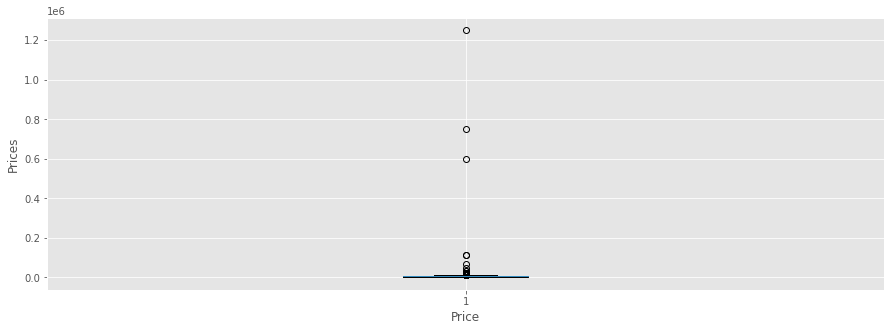

In [100]:
plt.figure(figsize=(15,5))
plt.style.use('ggplot')
plt.boxplot(cities['Price'])
plt.xlabel('Price')
plt.ylabel('Prices')
plt.show()

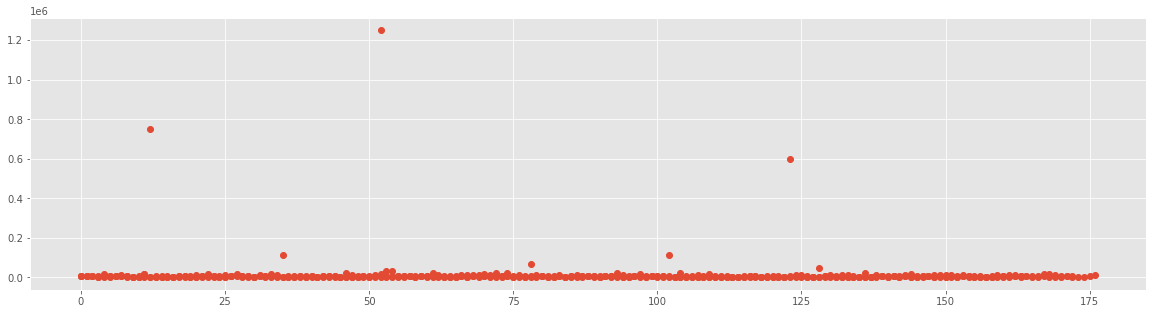

In [47]:
plt.figure(figsize=(20,5))
plt.plot(cities['Price'],'o')
plt.show()

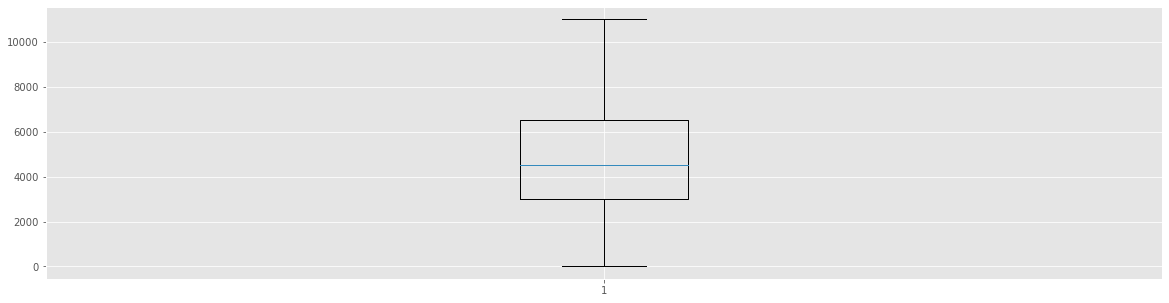

In [101]:
plt.figure(figsize=(20,5))
plt.boxplot(cities.Price[~(cities['Price']>=11500)])
plt.show()

In [102]:
cities[cities['Price']>=11500].shape , cities[~(cities['Price']>=11500)].shape

((55, 4), (460, 4))

In [103]:
#Without Outliers
cities = cities[~(cities['Price']>=11500)]

### Duplicated

In [104]:
cities.shape , cities[~cities.duplicated()].shape , cities[cities.duplicated()].shape

((460, 4), (458, 4), (2, 4))

In [105]:
#Without Duplicated Rows
cities = cities[~cities.duplicated()]

## Data Preparation

### Split city column

In [53]:
import numpy as np

In [106]:
cities['City1'] = cities['City'].apply(lambda x:x.split('/')[0].replace(' ',''))

In [107]:
cities['Street'] = np.nan

In [108]:
cities['Street'] = cities['City'].apply(lambda x:x.split(' / ')[-1])

In [109]:
cities

,Title,City,Price,Time,City1,Street
0,Appartement meublé pour la location,Tanger,5000,08 Oct 2022 06:00,Tanger,Tanger
1,Appartement meublé neuf,Tanger / Centre ville,5000,08 Oct 2022 05:58,Tanger,Centre ville
2,A louer super appartement meublé neuf,Tanger / Centre ville,5500,07 Oct 2022 15:59,Tanger,Centre ville
3,à louer un appartement meublé,Tanger / Centre ville,4500,07 Oct 2022 15:55,Tanger,Centre ville
4,شقه مجهزة للكراء فالمستقبل قرب أسواق السلام,Tanger / Marjane,3000,07 Oct 2022 13:18,Tanger,Marjane
...,...,...,...,...,...,...
166,Appartement hay nahda,Rabat / Hay Ennahda,4600,25 Aoû 2022 10:01,Rabat,Hay Ennahda
169,Appartement meublé à louer à Agdal RABAT,Rabat / Agdal,10000,24 Aoû 2022 22:50,Rabat,Agdal
170,Appartement à harhoura,Rabat / Harhoura,6000,24 Aoû 2022 22:49,Rabat,Harhoura
171,Coquette appartement refaite à neuf à Hassan,Rabat / Hassan,7500,24 Aoû 2022 22:49,Rabat,Hassan


### Last step

In [110]:
cities.to_csv('Rent_Analysis/cities_clean.csv')

In [ ]:
https://www.marocannonces.com/maroc/location-appartements-tanger-b321-t601.html?pge=2
https://www.marocannonces.com/maroc/location-appartements-casablanca-b321-t563.html?pge=2
https://www.marocannonces.com/maroc/location-appartements-rabat-b321-t590.html?pge=2

In [19]:
casa = pd.read_csv('casa.csv',error_bad_lines=False)
casa['Index'] = range(len(casa))
casa = casa.set_index('Index')
casa.to_csv('casa.csv')

C:\Users\pc\AppData\Local\Temp\ipykernel_2904\1595076823.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  casa = pd.read_csv('casa.csv',error_bad_lines=False)
b'Skipping line 28: expected 4 fields, saw 6\nSkipping line 38: expected 4 fields, saw 6\nSkipping line 39: expected 4 fields, saw 6\nSkipping line 40: expected 4 fields, saw 6\nSkipping line 49: expected 4 fields, saw 6\nSkipping line 50: expected 4 fields, saw 6\nSkipping line 51: expected 4 fields, saw 6\nSkipping line 52: expected 4 fields, saw 6\nSkipping line 111: expected 4 fields, saw 5\nSkipping line 123: expected 4 fields, saw 6\nSkipping line 124: expected 4 fields, saw 6\nSkipping line 169: expected 4 fields, saw 6\n'


In [21]:
rabat = pd.read_csv('rabat.csv',error_bad_lines=False)
rabat['Index'] = range(len(rabat))
rabat = rabat.set_index('Index')
rabat.to_csv('rabat.csv')

C:\Users\pc\AppData\Local\Temp\ipykernel_2904\3961396039.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  rabat = pd.read_csv('rabat.csv',error_bad_lines=False)
b'Skipping line 42: expected 4 fields, saw 5\nSkipping line 47: expected 4 fields, saw 5\nSkipping line 66: expected 4 fields, saw 5\nSkipping line 102: expected 4 fields, saw 5\n'


In [23]:
tanger = pd.read_csv('tanger.csv',error_bad_lines=False)
tanger['Index'] = range(len(tanger))
tanger = tanger.set_index('Index')
tanger.to_csv('tanger.csv')

C:\Users\pc\AppData\Local\Temp\ipykernel_2904\1067001087.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  tanger = pd.read_csv('tanger.csv',error_bad_lines=False)


## Decision, Insights

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
cities = pd.read_csv('cities_clean.csv')
cities.shape

(459, 7)

In [7]:
cities.drop(columns='Unnamed: 0',inplace=True)

In [8]:
cities.groupby('City1').mean()

,Price
City1,
Casablanca,4573.631579
Rabat,6395.687943
Tanger,3817.656627


In [11]:
round(cities.groupby('City1').describe(),2)

Price                                                        
            count     mean      std  min     25%     50%     75%      max
City1                                                                    
Casablanca  152.0  4573.63  2252.37  1.0  2800.0  4500.0  6000.0  11000.0
Rabat       141.0  6395.69  2208.07  1.0  4500.0  6500.0  8000.0  11000.0
Tanger      166.0  3817.66  2252.69  1.0  2500.0  3500.0  5500.0  11000.0

In [12]:
cities.groupby('City1').sum()

,Price
City1,
Casablanca,695192
Rabat,901792
Tanger,633731


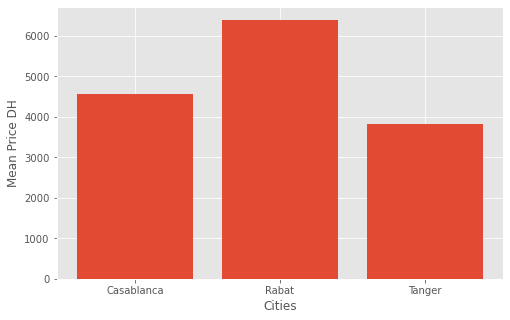

In [116]:
plt.figure(figsize=(8,5))
plt.style.use('ggplot')
plt.xlabel('Cities')
plt.ylabel('Mean Price DH')

x = cities.groupby('City1').mean().index
y = cities.groupby('City1').mean()['Price']
plt.bar(x,y)
plt.show()

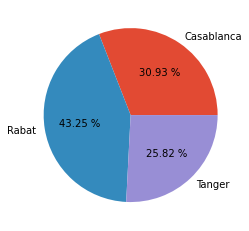

In [117]:
plt.pie(cities.groupby('City1').mean()['Price'],autopct='%.2f %%',labels=cities.groupby('City1').mean().index)
plt.show()